# Análise dos resultados do tcc 2 (GRUPO 01)

Foram testados os modelos Common Blocks e Common Substring com quatro solvers diferentes com 10 instancias do problema.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
MILS_TO_HOURS = 2.77778 * 1e-7
MILS_TO_MINS = 1.66667 * 1e-5
MILS_TO_SECS = 1e-3

## Importando dados dataset

In [3]:
df = pd.read_csv(
    './resultados_tcc_1.csv.gz',
    compression='gzip'
)
df.rename(columns={'TIME': 'TIME(ms)'}, inplace=True)

O dataframe a seguir contém os dados de 31 execuções para cada solver, modelo e instância do problema. Para iniciarmos vamos remover algumas colunas que não importam por enquanto (como a coluna de nome da instância e do resultado obtido) e calcular a média do tempo de execução

In [4]:
df.head()

,INSTANCE,MODEL,SIZE,RECVAL,TIME(ms),SOLVER
0,rand_S1-n170-A4-D0.04-10.dat,cs,170,54,2079.3940,CPLEX
1,rand_S1-n170-A4-D0.04-10.dat,cs,170,54,1905.7864,CPLEX
2,rand_S1-n170-A4-D0.04-10.dat,cs,170,54,1958.1331,CPLEX
3,rand_S1-n170-A4-D0.04-10.dat,cs,170,54,1940.7581,CPLEX
4,rand_S1-n170-A4-D0.04-10.dat,cs,170,54,1954.5483,CPLEX


In [5]:
df.drop(labels=['INSTANCE', 'RECVAL'], axis='columns', inplace=True)

In [6]:
df_mean = pd.DataFrame(df.groupby(['MODEL','SIZE','SOLVER'])['TIME(ms)'].mean())

In [7]:
df_mean.head()

TIME(ms)
MODEL SIZE SOLVER             
cb    113  CBC      798.509694
           CPLEX    645.323271
           GUROBI   544.115116
           SCIP    8366.244648
      114  CBC     2034.015381

In [8]:
df_mean = df_mean.reset_index()

Desse modo obtemos a média do tempo de execução para cada instância separada por modelo, tamanho e solver.

In [9]:
df_mean.head()

,MODEL,SIZE,SOLVER,TIME(ms)
0,cb,113,CBC,798.509694
1,cb,113,CPLEX,645.323271
2,cb,113,GUROBI,544.115116
3,cb,113,SCIP,8366.244648
4,cb,114,CBC,2034.015381


## Modelo mais rápido no geral

Como podemos ver abaixo, o modelo common substring foi o mais rápido, com um speedup de 111%.

In [14]:
df_mean[ df_mean['MODEL'] == 'cb' ]['TIME(ms)'].sum() * MILS_TO_MINS

7.260270828093262

In [15]:
df_mean[ df_mean['MODEL'] == 'cs' ]['TIME(ms)'].sum() * MILS_TO_MINS

6.509340198708124

In [11]:
time_by_model = pd.DataFrame(df_mean.groupby(['MODEL'])['TIME(ms)'].sum() * MILS_TO_MINS).rename(columns={'TIME(ms)': 'TIME(m)'})

In [12]:
time_by_model

,TIME(m)
MODEL,
cb,7.260271
cs,6.509340


In [178]:
(time_by_model['TIME(m)'].max() / time_by_model['TIME(m)'].min())

1.1153620188155084

<Axes: xlabel='MODEL'>

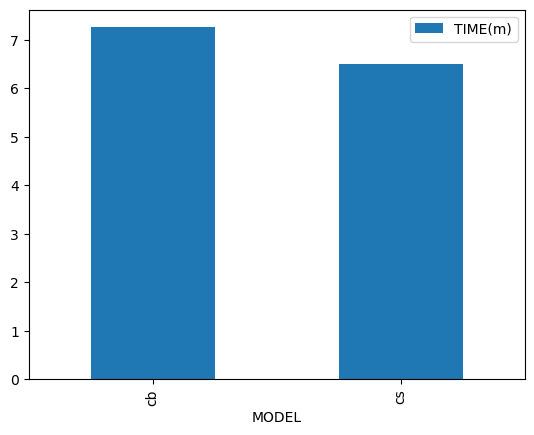

In [176]:
time_by_model.plot(kind='bar')

## Solver foi mais rápido no geral

O CPLEX foi o solver mais rápido no testes em geral com os dois modelos. Executando os testes e em 0.55 minuto seguido pelo GUROBI, SCIP e CBC, respectivamente com um 1.5, 1.67, 4.9 e 6.63 minutos.

In [173]:
time_by_solvers = (pd.DataFrame(df_mean.groupby('SOLVER')['TIME(ms)'].sum() * MILS_TO_MINS)
                    .rename(columns={'TIME(ms)': 'TIME(m)'})
                    .sort_values(by='TIME(m)'))

In [174]:
time_by_solvers

,TIME(m)
SOLVER,
CPLEX,0.552015
GUROBI,1.674395
SCIP,4.903974
CBC,6.639227


<Axes: xlabel='SOLVER'>

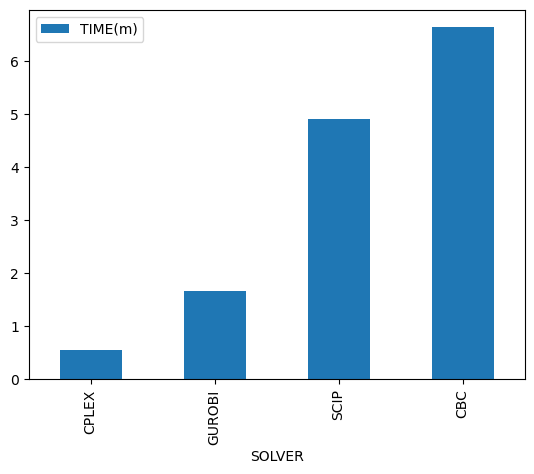

In [179]:
time_by_solvers.plot(kind='bar')

## Solver mais rápido com o modelo common blocks

Com o modelo CB o solver que mais se destacou o foi o GUROBI, sendo o mais rápido em 6 de 10 testes. No entando pode-se destacar que os tempos do gurobi e do CPLEX foram aproximados.

In [16]:
df_cb = (df_mean[ df_mean['MODEL'] == 'cb' ]
         .drop(labels=['MODEL'], axis='columns')
         .reset_index()
         .drop('index', axis='columns'))

In [17]:
for key, df in df_cb.groupby(['SIZE']):
    print(key[0],df.sort_values(by=['TIME(ms)']).iloc[0]['SOLVER'])

113 GUROBI
114 CPLEX
115 GUROBI
118 GUROBI
119 GUROBI
123 GUROBI
137 GUROBI
158 CPLEX
162 CPLEX
170 CPLEX


In [18]:
df_cb['SPEEDUP'] = df_cb['TIME(ms)'] / df_cb.groupby(['SIZE'])['TIME(ms)'].transform('min')

In [19]:
df_cb_sorted = pd.DataFrame()
for key, df in df_cb.groupby('SIZE'):
    df_cb_sorted = pd.concat([df_cb_sorted,df.sort_values('TIME(ms)', ascending=True)])
pd.DataFrame(df_cb_sorted.groupby('SIZE').apply(lambda x: x.drop('SIZE', axis='columns').set_index('SOLVER')))

TIME(ms)    SPEEDUP
SIZE SOLVER                         
113  GUROBI    544.115116   1.000000
     CPLEX     645.323271   1.186005
     CBC       798.509694   1.467538
     SCIP     8366.244648  15.375872
114  CPLEX     405.231365   1.000000
     GUROBI    407.004823   1.004376
     CBC      2034.015381   5.019393
     SCIP     2589.926019   6.391228
115  GUROBI    770.778061   1.000000
     CPLEX    1216.423265   1.578176
     SCIP     4432.614645   5.750831
     CBC      5412.095513   7.021600
118  GUROBI    588.882277   1.000000
     CBC       614.213719   1.043016
     CPLEX    1517.852603   2.577514
     SCIP     7140.554952  12.125607
119  GUROBI    327.270177   1.000000
     CPLEX     376.573732   1.150651
     SCIP      833.985677   2.548309
     CBC       867.667058   2.651226
123  GUROBI   1378.199610   1.000000
     CPLEX    1549.810168   1.124518
     CBC      3931.360577   2.852534
     SCIP     6875.972432   4.989098
137  GUROBI   1323.715903   1.000000
     CPLEX    1617.315187   1.221799
     CBC      2363.742377   1.785687
     SCIP    17283.008597  13.056433
158  CPLEX    6617.511677   1.000000
     GUROBI  29365.453565   4.437537
     CBC     47800.103413   7.223275
     SCIP    61085.755013   9.230925
162  CPLEX    8013.901926   1.000000
     GUROBI   8500.906935   1.060770
     SCIP    19890.846303   2.482043
     CBC     36160.772032   4.512255
170  CPLEX    2833.677748   1.000000
     GUROBI  39698.821465  14.009646
     SCIP    45428.911635  16.031785
     CBC     54006.309894  19.058734

![](cb1.png) ![](cb2.png)

## Solver mais rápido com o modelo common substring

Com o modelo CS o solver que mais se destacou foi o CPLEX, sendo o mais rápido em 8 de 10 testes.

In [153]:
df_cs = (df_mean[ df_mean['MODEL'] == 'cs' ]
         .drop(labels=['MODEL'], axis='columns')
         .reset_index()
         .drop('index', axis='columns'))

In [154]:
for key, df in df_cs.groupby(['SIZE']):
    print(key[0],df.sort_values(by=['TIME(ms)']).iloc[0]['SOLVER'])

113 CPLEX
114 GUROBI
115 CPLEX
118 CPLEX
119 GUROBI
123 CPLEX
137 CPLEX
158 CPLEX
162 CPLEX
170 CPLEX


In [155]:
df_cs['SPEEDUP'] = df_cs['TIME(ms)'] / df_cs.groupby(['SIZE'])['TIME(ms)'].transform('min')

In [156]:
df_cs_sorted = pd.DataFrame()
for key, df in df_cs.groupby('SIZE'):
    df_cs_sorted = pd.concat([df_cs_sorted,df.sort_values('TIME(ms)', ascending=True)])
pd.DataFrame(df_cs_sorted.groupby('SIZE').apply(lambda x: x.drop('SIZE', axis='columns').set_index('SOLVER')))

TIME(ms)    SPEEDUP
SIZE SOLVER                          
113  CPLEX      131.865216   1.000000
     GUROBI     223.077206   1.691706
     CBC       2528.662252  19.176113
     SCIP      5541.219203  42.021841
114  GUROBI      88.360752   1.000000
     CPLEX      121.132300   1.370884
     CBC       1513.407755  17.127602
     SCIP      3236.938145  36.633212
115  CPLEX      217.910235   1.000000
     GUROBI     339.791306   1.559318
     CBC       1915.793845   8.791665
     SCIP      7824.921690  35.908922
118  CPLEX      244.734816   1.000000
     GUROBI     321.005877   1.311648
     CBC       2356.868458   9.630295
     SCIP      3139.880671  12.829726
119  GUROBI      76.650568   1.000000
     CPLEX      130.710074   1.705272
     CBC        714.235403   9.318071
     SCIP      1327.051084  17.312997
123  CPLEX      346.414390   1.000000
     GUROBI     539.768545   1.558159
     CBC       3188.090265   9.203112
     SCIP      4772.060477  13.775584
137  CPLEX      277.632552   1.000000
     GUROBI     561.857187   2.023744
     CBC       2079.731561   7.490950
     SCIP     10377.018274  37.376807
158  CPLEX     3263.897939   1.000000
     GUROBI    5225.784777   1.601087
     SCIP     34525.536261  10.578007
     CBC     161055.740897  49.344601
162  CPLEX     1657.126813   1.000000
     GUROBI    3557.740716   2.146933
     CBC      19398.382648  11.706034
     SCIP     32959.959216  19.889823
170  CPLEX     1935.759126   1.000000
     GUROBI    6624.329423   3.422084
     SCIP     16605.442252   8.578259
     CBC      49613.140626  25.629811

![](cs1.png) ![](cs2.png)